#Librarys.

In [25]:
# ! pip install pandas
import pandas
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# ! pip install contextily
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset.

The dataset, titled "*Electric Vehicle Population Data*," consists of
**210,165 records** detailing electric vehicle registrations in Washington State. It includes **17 features** covering aspects such as **the vehicle’s make**, **model**, **type**, **electric range**, **location of registration (city and county)**, and **base MSRP**.

This dataset provides valuable insights into electric vehicle adoption patterns and model popularity across various locations, offering a foundation for exploring trends in sustainable transportation.



In [27]:
df = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

# 1. Data Cleaning and Feature Engineering.


## 1.1. Document Missing Values.
Check for missing values and document their frequency and distribution across features.


In [28]:
# Check and document missing values.
print("Mising Values Summary:")
print("-----------------------------")
print(df.isnull().sum())

# Calculate and display the percentage of missing values, filtering only columns with missing values.
missing_values_distribution = (df.isnull().sum() / len(df)) * 100
missing_values_summary = pd.DataFrame({'Percentage of Missing Values': missing_values_distribution})
missing_values_summary_filtered = missing_values_summary[missing_values_summary['Percentage of Missing Values'] > 0]

print("\n\nFiltered Summary of Missing Values (only columns with missing values)")
print("-------------------------------------------------------------------------------------------")
missing_values_summary_filtered

Mising Values Summary:
-----------------------------
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 445
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       4
2020 Census Tract                  

,Percentage of Missing Values
County,0.001903
City,0.001903
Postal Code,0.001903
Electric Range,0.002379
Base MSRP,0.002379
Legislative District,0.211738
Vehicle Location,0.004758
Electric Utility,0.001903
2020 Census Tract,0.001903


***Explanation:*** We checked each feature for missing values and calculate the percentage of missing data per feature. This helps in deciding appropriate handling strategies for data quality improvement.

## 1.2. Missing Value Strategies.
If missing values are present, apply multiple strategies (e.g.,mean/median imputation, dropping rows) and compare their impact on the analysis.


In [29]:
# Drop rows where there are missing values in the specified columns.
df = df.dropna(subset=[
    'County',
    'City',
    'Postal Code',
    'Electric Range',
    'Base MSRP',
    'Vehicle Location',
    'Electric Utility',
    '2020 Census Tract'
])

In [30]:
# Apply median imputation for 'Legislative District'.
median_legislative_district = df['Legislative District'].median()
df['Legislative District'].fillna(median_legislative_district, inplace=True)
df.isnull().sum()

<ipython-input-30-7d371df6da0a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legislative District'].fillna(median_legislative_district, inplace=True)


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


***Explination:*** To handle missing values in the dataset, we applied a combination of strategies based on the percentage of missing data in each feature:

* **Dropping Rows:** For features with very low percentages of missing data (such as County, City, Postal Code, Electric Range, Base MSRP, Vehicle Location, Electric Utility, and 2020 Census Tract), rows with missing values were dropped. This approach minimizes data loss while ensuring a clean dataset for these specific features.

* **Median Imputation:** For the Legislative District feature, which had a higher percentage of missing values, we applied median imputation. This method fills missing values with the median of the feature, preserving the central tendency of the data without being affected by outliers.

## 1.3. Feature Encoding.
Encode categorical features (e.g., Make, Model) using techniques like one-hot encoding.


In [31]:
# Define categorical columns to be one-hot encoded.
categorical_columns = [
    'VIN (1-10)',
    'County',
    'City',
    'State',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Vehicle Location',
    'Electric Utility'
]

# Apply one-hot encoding.
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,VIN (1-10)_1C4JJXN61P,VIN (1-10)_1C4JJXN62P,VIN (1-10)_1C4JJXN63P,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,98380.0,2021,30.0,0.0,35.0,267929112,5.303509e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,98370.0,2018,215.0,0.0,23.0,475911439,5.303509e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,98012.0,2016,15.0,0.0,1.0,101971278,5.306105e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,98310.0,2018,215.0,0.0,23.0,474363746,5.303508e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,98052.0,2019,150.0,0.0,45.0,476346482,5.303303e+10,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210160,98837.0,2018,26.0,0.0,13.0,347733676,5.302501e+10,False,False,False,...,False,False,False,False,False,False,True,False,False,False
210161,98312.0,2024,26.0,0.0,35.0,254263509,5.303509e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
210162,98466.0,2023,42.0,0.0,28.0,254488797,5.305307e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
210163,98034.0,2021,0.0,0.0,1.0,137279852,5.303302e+10,False,False,False,...,False,False,False,False,False,False,False,False,True,False


***Explanation:*** One-hot encoding was applied to multiple categorical features, increasing the dataset’s dimensionality but allowing each unique category to be represented as a binary feature. This transformation ensures that categorical data is correctly interpreted by machine learning algorithms.



## 1.4. Normalization.
Normalize numerical features if necessary for chosen analysis methods.

In [32]:
numerical_columns = ['Electric Range', 'Base MSRP']
print(df[numerical_columns].describe())

       Electric Range      Base MSRP
count   210150.000000  210150.000000
mean        50.602579     897.312039
std         86.974319    7652.606144
min          0.000000       0.000000
25%          0.000000       0.000000
50%          0.000000       0.000000
75%         42.000000       0.000000
max        337.000000  845000.000000


In [33]:
# Select numerical columns for normalization.
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df[numerical_columns].describe())

       Electric Range     Base MSRP
count    2.101500e+05  2.101500e+05
mean    -2.407359e-17  9.196651e-18
std      1.000002e+00  1.000002e+00
min     -5.818120e-01 -1.172560e-01
25%     -5.818120e-01 -1.172560e-01
50%     -5.818120e-01 -1.172560e-01
75%     -9.890965e-02 -1.172560e-01
max      3.292904e+00  1.103029e+02


***Explanation***:  Z-score normalization was applied to the **Electric Range** and *Base MSRP* features, which have widely varying ranges. This transformation standardizes the values, centering them around a mean of 0 with a standard deviation of 1. Normalization reduces the influence of differing scales in numerical data, ensuring that features are correctly interpreted in subsequent analyses and comparisons.

# 2. Exploratory Data Analysis.


## 2.1. Descriptive Statistics.
Calculate summary statistics (mean, median, standard deviation) for numerical features.


In [34]:
# Define the list of numerical columns for which we want to calculate statistic.
numerical_columns = ['Postal Code','Model Year','Electric Range', 'Base MSRP','Legislative District','DOL Vehicle ID','2020 Census Tract']

# Calculate the mean, median, standard  deviation values for each numerical column.
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
std_dev_values = df[numerical_columns].std()

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)


Mean values:
 Postal Code             9.817819e+04
Model Year              2.021049e+03
Electric Range         -2.407359e-17
Base MSRP               9.196651e-18
Legislative District    2.893684e+01
DOL Vehicle ID          2.290765e+08
2020 Census Tract       5.297929e+10
dtype: float64

Median values:
 Postal Code             9.812500e+04
Model Year              2.022000e+03
Electric Range         -5.818120e-01
Base MSRP              -1.172560e-01
Legislative District    3.200000e+01
DOL Vehicle ID          2.405161e+08
2020 Census Tract       5.303303e+10
dtype: float64

Standard deviation values:
 Postal Code             2.445491e+03
Model Year              2.988946e+00
Electric Range          1.000002e+00
Base MSRP               1.000002e+00
Legislative District    1.489343e+01
DOL Vehicle ID          7.115445e+07
2020 Census Tract       1.551507e+09
dtype: float64


***Explanation:*** Descriptive statistics were calculated for key numerical features to understand their central tendency and variability. The **mean** provides the average value, while the **median** offers a midpoint that is less influenced by outliers. The **standard deviation** shows the spread of values, indicating which features have more variability.

## 2.2. Spatial Distribution.
Visualize the spatial distribution of EVs across locations (e.g., maps).

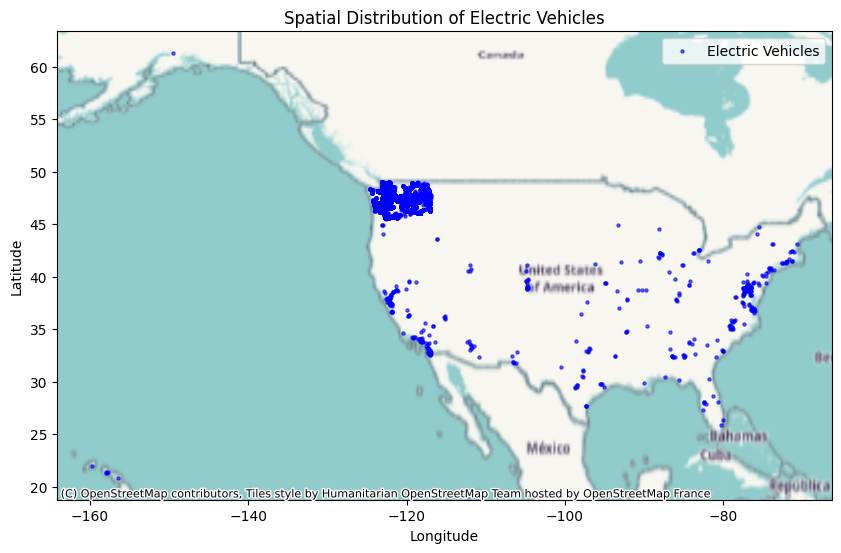

In [35]:
# Convert 'Vehicle Location' data into Point geometry (longitude, latitude).
df['geometry'] = df['Vehicle Location'].apply(lambda x: Point(float(x.split()[1][1:]), float(x.split()[2][:-1])) if pd.notnull(x) else None)

gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, markersize=5, color="blue", alpha=0.6, label="Electric Vehicles")

# Add a basemap to provide geographic context .
ctx.add_basemap(ax, crs=gdf.crs.to_string())

plt.title("Spatial Distribution of Electric Vehicles")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

plt.savefig("electric_vehicles_distribution.png", dpi=300)
plt.show()


***Explanation:*** The plot reveals clusters of EV registrations, particularly concentrated in the state of Washington. By visualizing these spatial data points, we can identify regions with **high** or **low** EV adoption rates, which can inform infrastructure planning and targeted initiatives. This map provides an overview of the geographic distribution of electric vehicles across the country, showing where EVs are most commonly registered.

## 2.3. Model Popularity.
Analyze the popularity of different EV models (categorical data) and identify any trends.


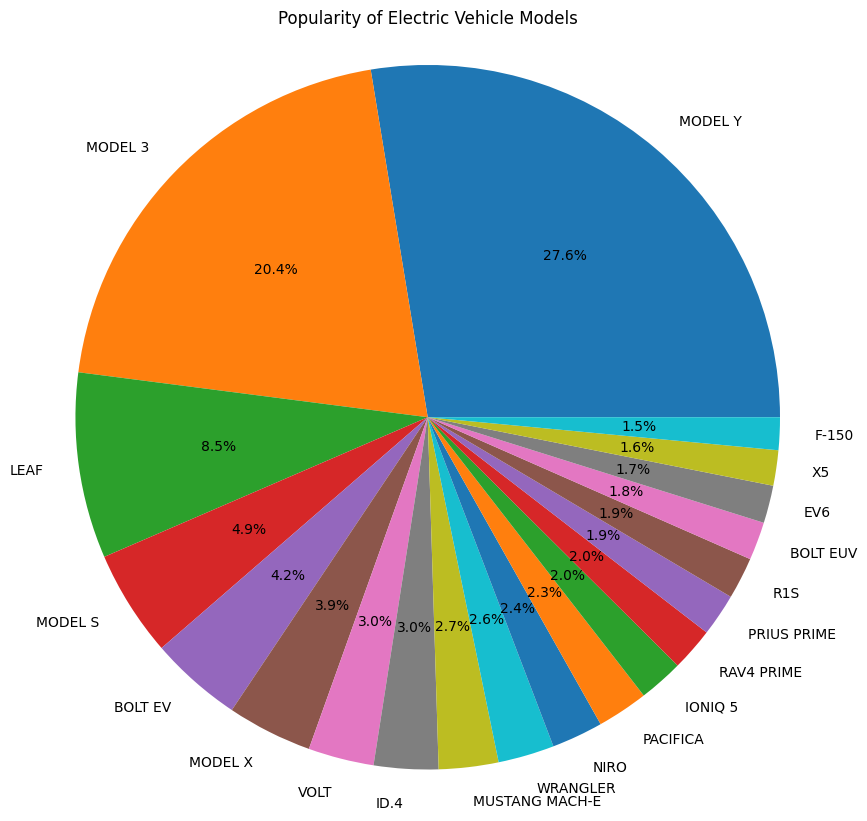

In [36]:
# Count the occurrences of each model in the 'Model' column and reset the index to create a DataFrame.
model_counts = df['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

# Calculate the total count of all models to determine percentages.
total_count = model_counts['Count'].sum()
model_counts['Percentage'] = (model_counts['Count'] / total_count) * 100

# Select the top 30 most popular models to plot.
top_20_models = model_counts.head(20)

plt.figure(figsize=(10, 10))
plt.pie(top_20_models['Count'], labels=top_20_models['Model'], autopct='%1.1f%%', startangle=0)
plt.title('Popularity of Electric Vehicle Models')
plt.axis('equal')
plt.show()

***Explanation:*** The chart shows that Model Y and Model 3 are the most popular electric vehicles, accounting for 25.1% and 18.6% of the dataset, respectively. Other models, such as the Leaf and Model S, also hold significant shares but are noticeably less popular than the top two models. This trend suggests that Tesla models dominate the EV market, particularly with their Model Y and Model 3 vehicles. The data provides insights into consumer preferences, which could be valuable for automakers and policy makers in understanding market demand.

##2.4. Investigate the relationship between every pair of numeric features.
Are there any correlations? Explain the results.


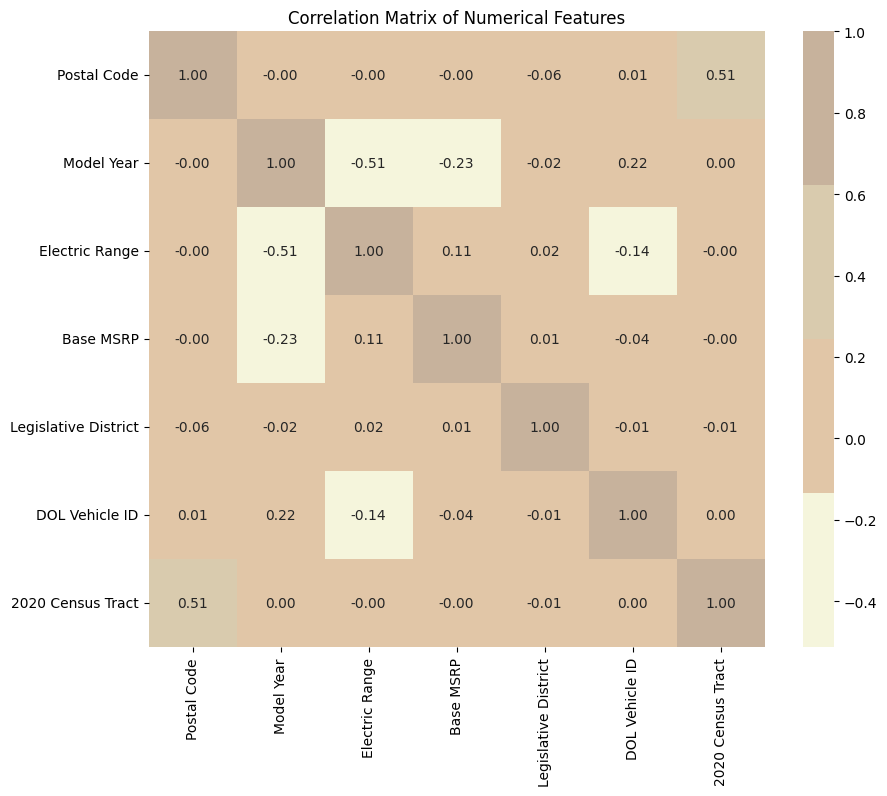

In [37]:
# Calculate the correlation matrix for the selected numerical columns.
correlation_matrix = df[numerical_columns].corr()

custom_cmap = sns.color_palette(["#F5F5DC", "#E1C6A7", "#D9CBAE", "#C7B29C"])

plt.figure(figsize=(10, 8))
# Create a heatmap of the correlation matrix with annotations and the custom color palette.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_cmap, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

***Explanation:***
* The correlation matrix shows a notable negative correlation (-0.51) between **Model Year** and **Electric Range**, indicating that older vehicles tend to have a shorter electric range compared to newer models, likely due to advancements in battery technology.

* There is a moderate positive correlation (0.51) between **Postal Code** and 2020 **Census Tract**, which may be attributed to geographic clustering within similar regions.

* Most other numerical features, such as **Base MSRP** and **Legislative District**, exhibit very low correlation values with each other, suggesting they are relatively independent.






# 3. Visualization


## 3.1. Data Exploration Visualizations.
Create various visualizations (e.g., histograms, scatter plots, boxplots) to explore the relationships between features.


For a comprehensive examination of relationships among numerical features, we used a pair plot. This visualization helps identify patterns, correlations, and potential outliers across multiple numerical features simultaneously. Each subplot displays the relationship between a pair of features, with histograms along the diagonal showing individual distributions.



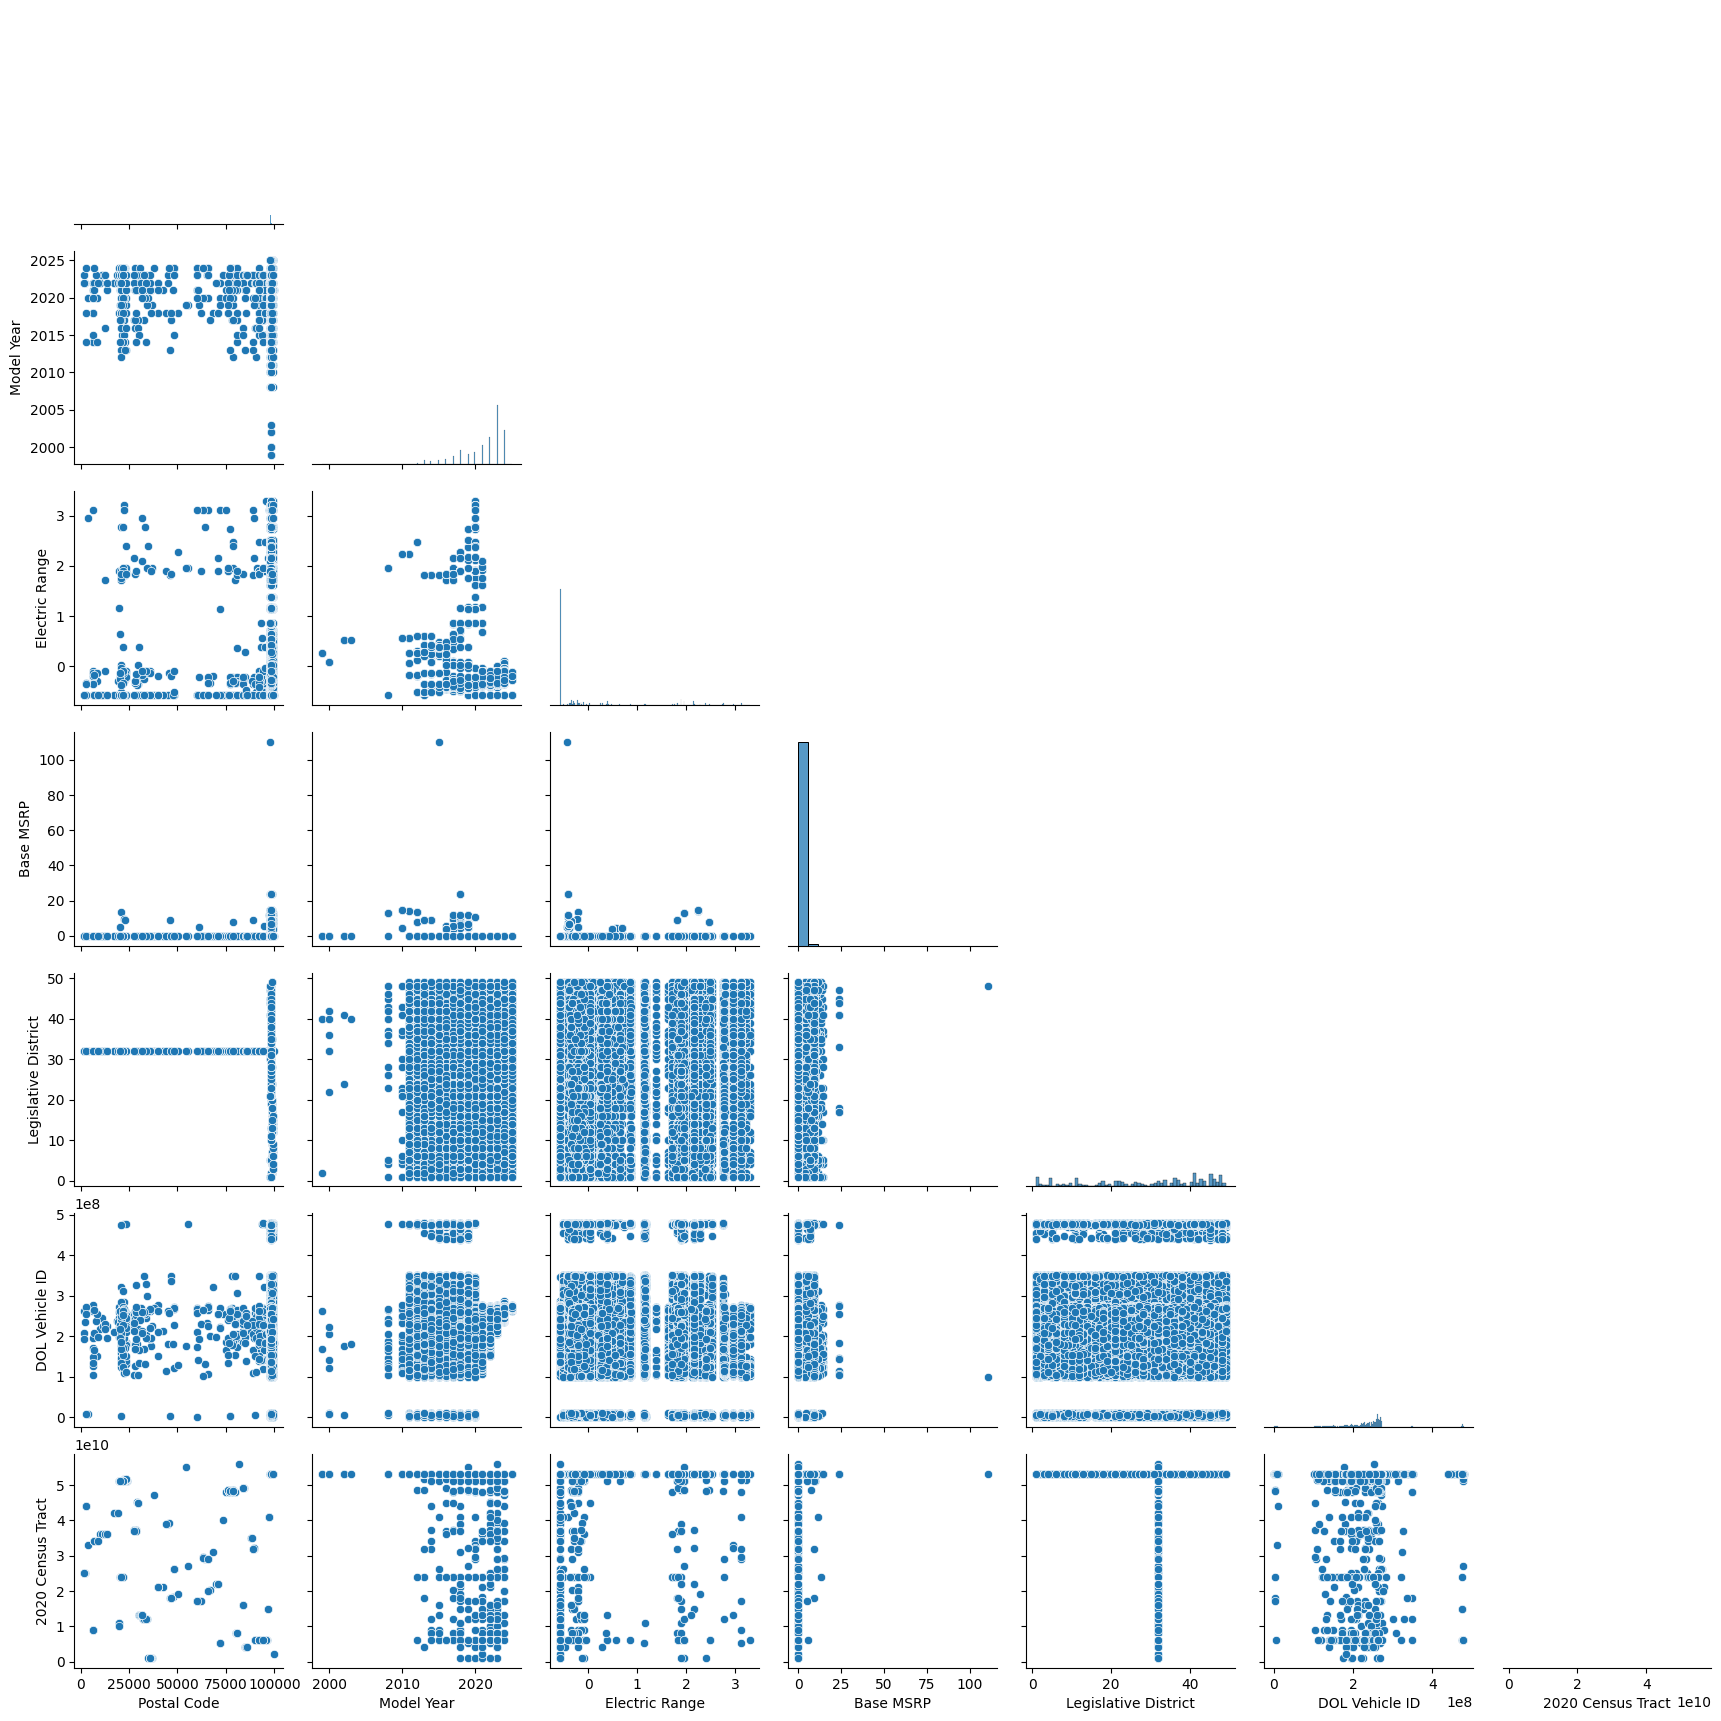

In [38]:
sns.pairplot(df, corner=True)
plt.show()

***Explanation:***
The pair plot reveals several insights:

* **Diagonal Histograms:** These show the distribution of individual features, indicating that some variables, such as Base MSRP, have a heavily skewed distribution.

* **Scatter Plots:** Each off-diagonal scatter plot represents a pairwise relationship between two features. For instance, we observe a general clustering pattern in Model Year vs. Electric Range, suggesting some differentiation in EV range across model years.

* **Outliers**: The plots show some data points lying outside the primary clusters, especially in Base MSRP, where high-end electric vehicles stand out in price compared to the majority.

Due to the complexity and variety of the categorical features in our dataset, we created separate visualizations rather than combining all categorical values into a single matrix. Each plot focuses on key categorical and numerical relationships, providing insights into the distribution of electric vehicle (EV) types across different attributes, such as Make, Model, City, and Model Year. These visualizations allow us to see the popularity of EV types, identify trends, and analyze distributions based on specific characteristics.

* Visualization 1: Top 20 Electric Vehicle Types by Make

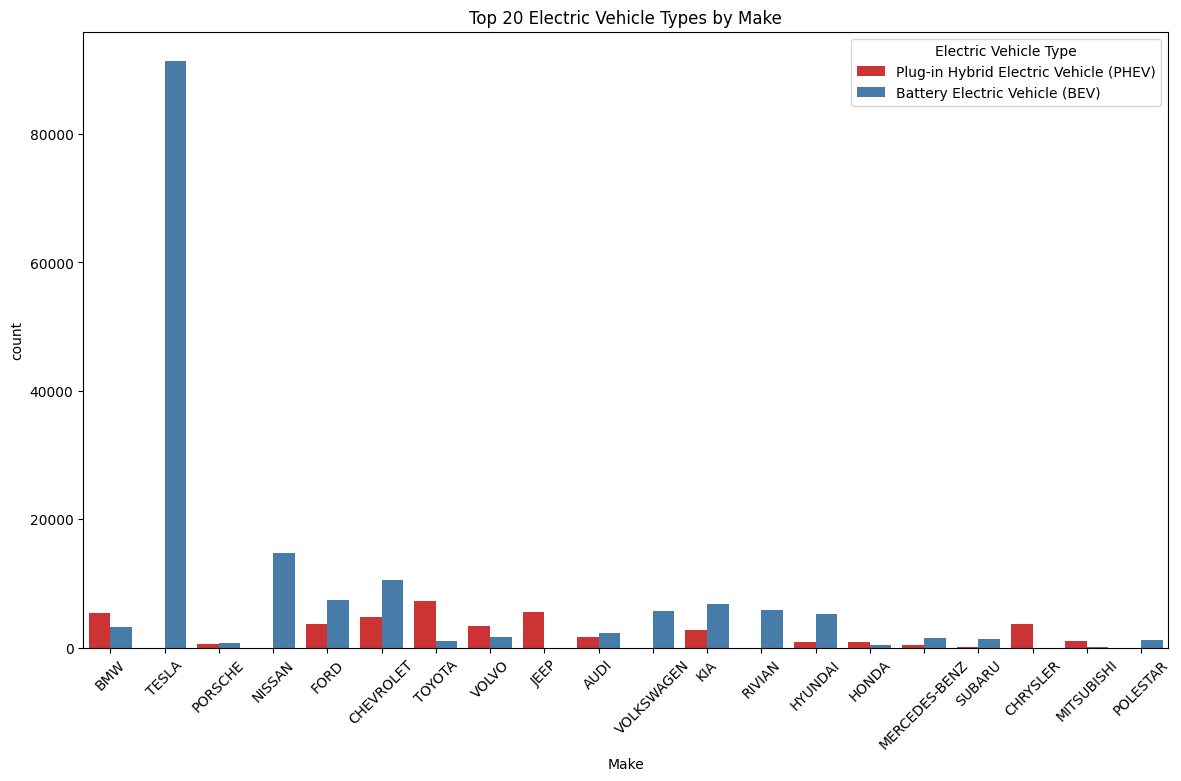

In [39]:
top_makes = df['Make'].value_counts().nlargest(20).index
filtered_df = df[df['Make'].isin(top_makes)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='Make', hue='Electric Vehicle Type', palette='Set1')
plt.title('Top 20 Electric Vehicle Types by Make')
plt.xticks(rotation=45)
plt.show()

***Explanation:*** This bar plot shows the distribution of electric vehicle types (Battery Electric Vehicle [BEV] vs. Plug-in Hybrid Electric Vehicle [PHEV]) across the top 20 most popular car makes. Tesla has the highest count, with the majority of its vehicles being BEVs. This suggests that Tesla dominates the EV market, particularly with BEVs, followed by other popular brands such as Nissan and Chevrolet, which have a mix of BEVs and PHEVs.

* Visualization 2: Top 20 Electric Vehicle Types by Model.

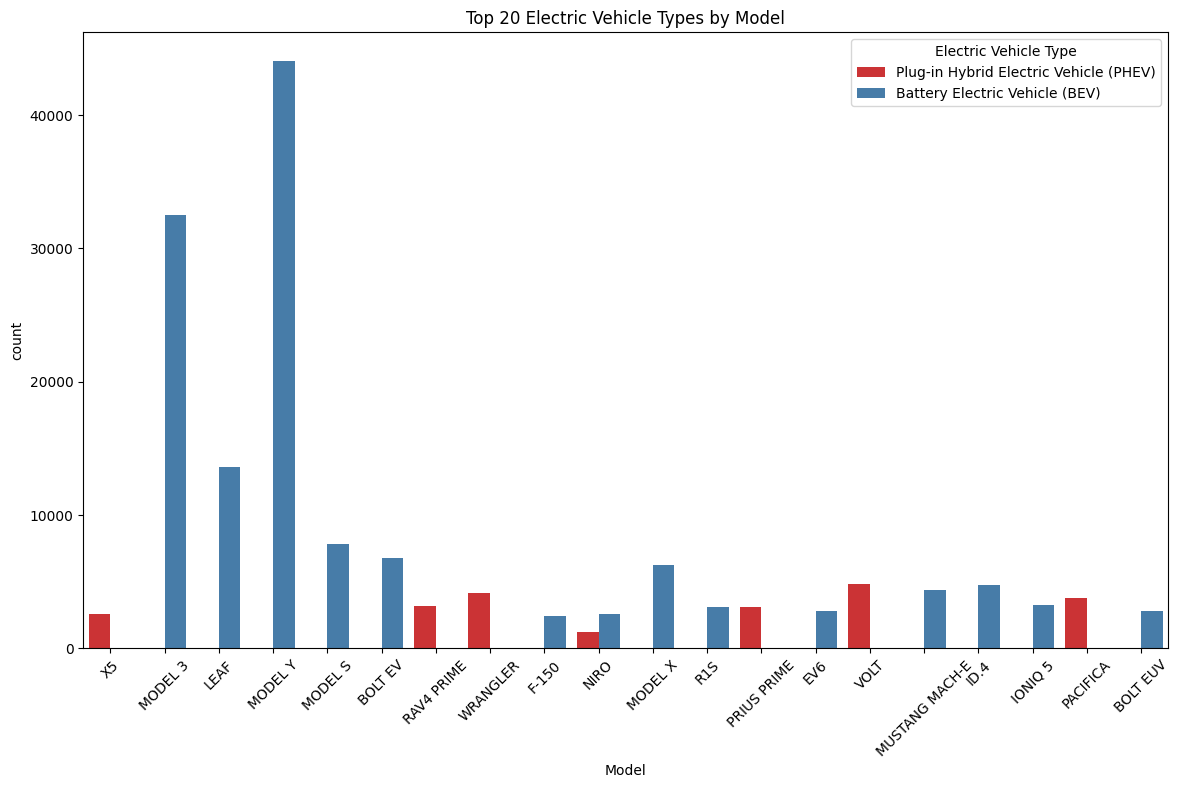

In [40]:
top_makes = df['Model'].value_counts().nlargest(20).index
filtered_df = df[df['Model'].isin(top_makes)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='Model', hue='Electric Vehicle Type', palette='Set1')
plt.title('Top 20 Electric Vehicle Types by Model')
plt.xticks(rotation=45)
plt.show()

***Explanation:*** This bar plot visualizes the distribution of EV types across the top 20 vehicle models. Models such as Model Y and Model 3 (both Tesla models) are prominent, primarily as BEVs. This highlights the popularity of specific Tesla models within the EV market. Other models like Leaf and Bolt EV also show significant numbers, emphasizing the demand for specific EV models across different manufacturers.

* Visualization 3: Top 20 Electric Vehicle Types by City.

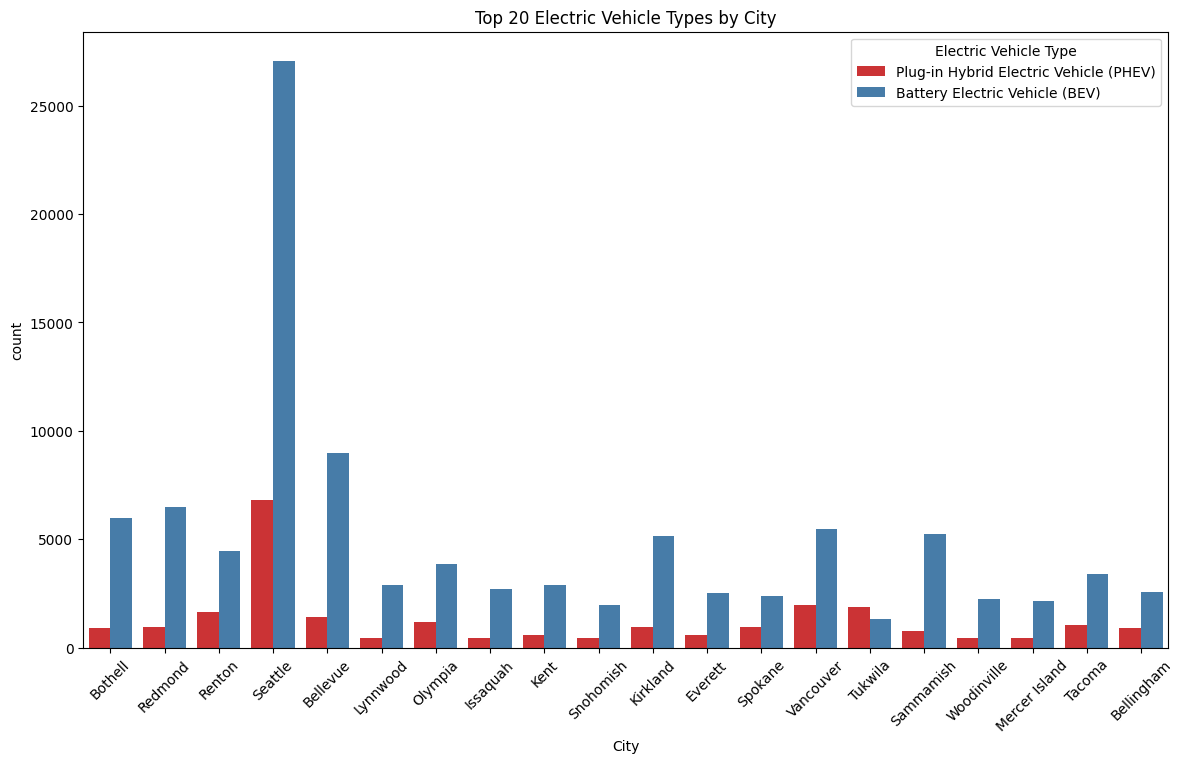

In [41]:
top_makes = df['City'].value_counts().nlargest(20).index
filtered_df = df[df['City'].isin(top_makes)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='City', hue='Electric Vehicle Type', palette='Set1')
plt.title('Top 20 Electric Vehicle Types by City')
plt.xticks(rotation=45)
plt.show()

***Explanation:*** This plot illustrates the distribution of EV types within the top 20 cities. Seattle leads in the number of registered EVs, with a substantial count of BEVs, particularly from brands like Tesla. Other cities, such as Bellevue and Vancouver, also show a high number of EV registrations with a mix of BEV and PHEV types. This suggests that EV adoption is concentrated in urban areas, with varying preferences for BEVs and PHEVs across cities.

* Visualization 4: Top 20 Electric Vehicle Types by Model Year.

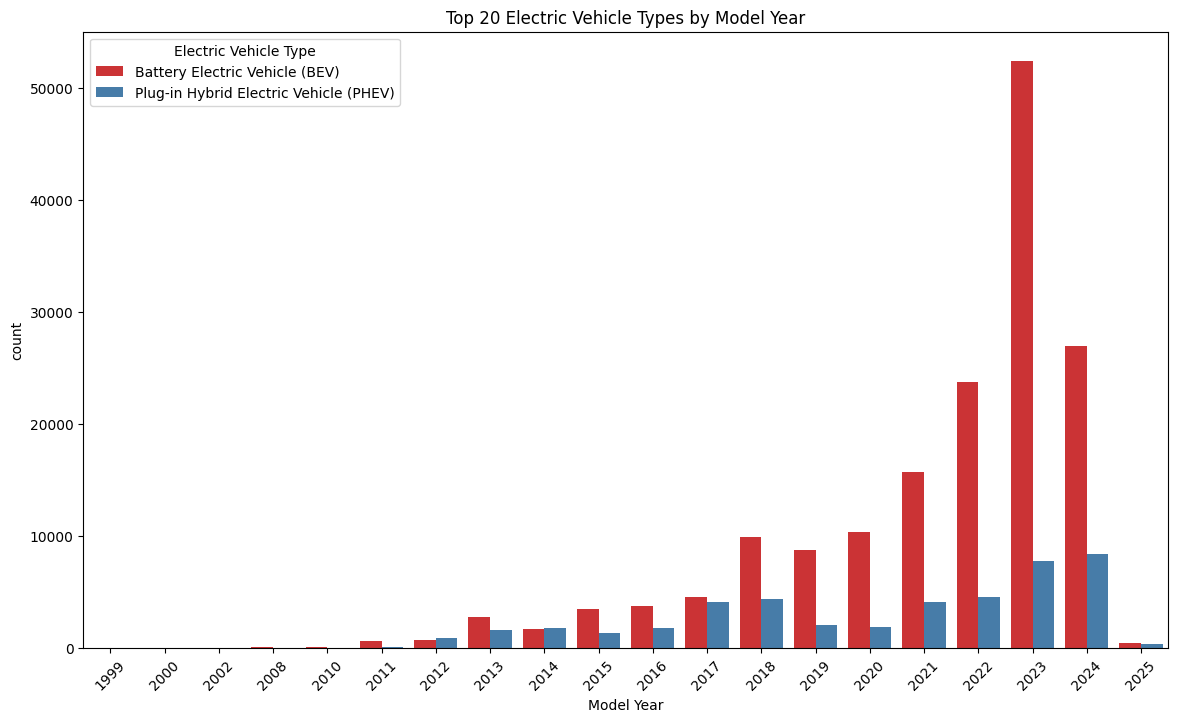

In [42]:
top_makes = df['Model Year'].value_counts().nlargest(20).index
filtered_df = df[df['Model Year'].isin(top_makes)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='Model Year', hue='Electric Vehicle Type', palette='Set1')
plt.title('Top 20 Electric Vehicle Types by Model Year')
plt.xticks(rotation=45)
plt.show()

***Explanation:*** This bar plot shows the count of EV types by model year, highlighting the growing trend of BEVs and PHEVs over time. The data reveals an increase in EV adoption in recent years, with a noticeable rise in both BEVs and PHEVs starting around 2018. The spike in recent model years reflects the growing popularity and availability of EVs, driven by advancements in technology and increased environmental awareness.

## 3.2. Comparative Visualization.
Compare the distribution of EVs across different locations (cities, counties) using bar charts or stacked bar charts.


### Distribution By Counties.

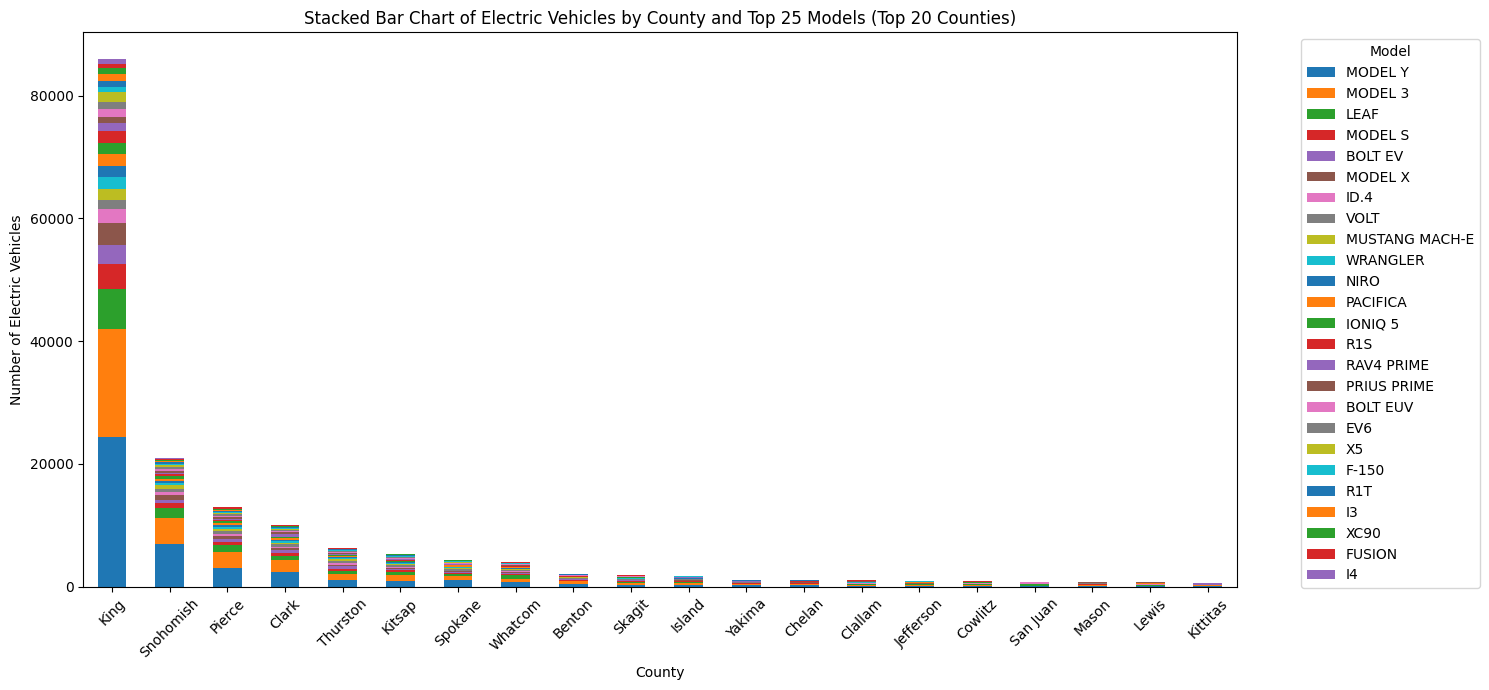

In [43]:
model_count_by_county = df.groupby(['County', 'Model']).size().unstack(fill_value=0)

# Identify the top 20 counties with the highest total number of EV registrations
# by summing across all models and selecting the largest values
top_counties = model_count_by_county.sum(axis=1).nlargest(20).index

# Filter the data to include only the top 20 counties.
model = model_count_by_county.loc[top_counties]

# Identify the top 25 models with the highest number of registrations across the selected counties
# by summing across all counties and selecting the largest values.
top_models = model.sum(axis=0).nlargest(25).index
model= model[top_models]

model.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Stacked Bar Chart of Electric Vehicles by County and Top 25 Models (Top 20 Counties)')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Explanation:*** This stacked bar chart shows the distribution of electric vehicles (EVs) by model across the top 20 counties with the highest EV registrations. Each bar represents a county, with different colors indicating the most popular EV models within that county.

Key observations:

*   King County stands out with the highest number of EVs, dominated by popular models like Model Y, Model 3, and LEAF. This suggests a higher concentration of EV adoption in this area.

*   Other counties, such as Snohomish and Pierce, also have a significant number of EVs, but with a more balanced distribution among different models.

*   The chart highlights regional trends, showing where specific EV models are most popular, which could be valuable for regional planning and market analysis.





### Distribution By Cities.

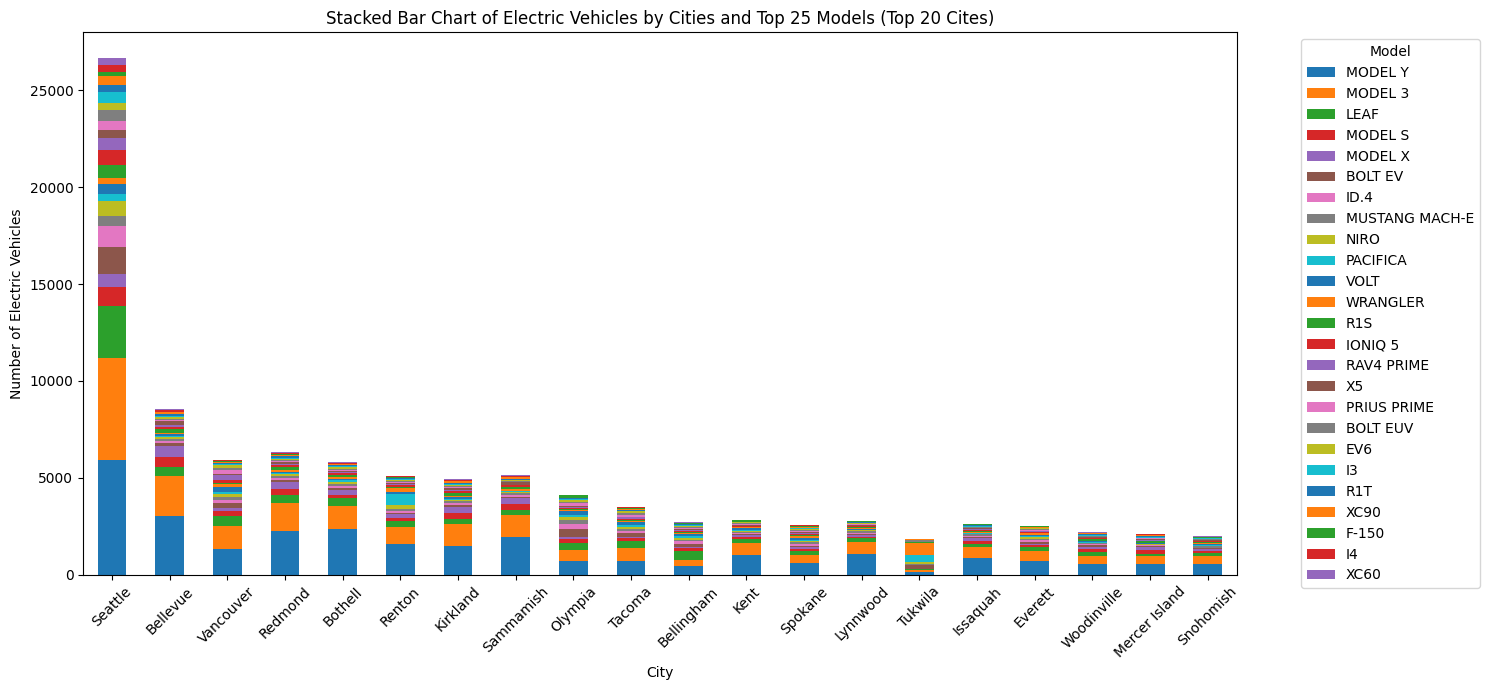

In [44]:
model = df.groupby(['City', 'Model']).size().unstack(fill_value=0)

top_city = model.sum(axis=1).nlargest(20).index
model = model.loc[top_city]

top_models = model.sum(axis=0).nlargest(25).index
model= model[top_models]

model.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Stacked Bar Chart of Electric Vehicles by Cities and Top 25 Models (Top 20 Cites)')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Explanation:*** This stacked bar chart illustrates the distribution of EV models in the top 20 cities with the highest EV registrations. Each bar represents a city, with different colors indicating the most popular EV models within each city.

* Seattle leads in EV registrations, with a substantial number of popular models such as Model Y and Model 3, mirroring the trend seen in King County.

* Other cities like Bellevue and Vancouver also show high EV adoption rates, with a diverse mix of models.

* This chart reveals that while major cities like Seattle dominate EV registrations, smaller cities contribute to a varied distribution of models, suggesting that EV adoption is spreading across urban areas in Washington.





## 3.3. Analyze the temporal trends in EV adoption rates and model popularity.

If the dataset includes data across multiple time points,
analyze the temporal trends in EV adoption rates and model popularity.

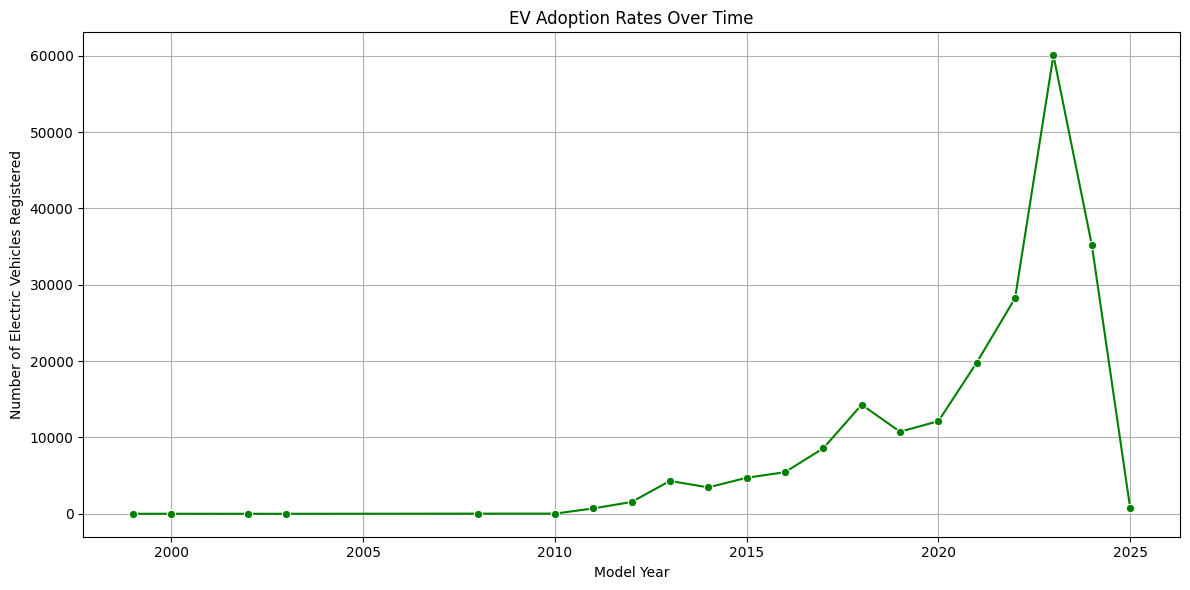

In [45]:
# This gives the number of electric vehicles registered per model year.
adoption_rates = df.groupby('Model Year').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
# Create a line plot to show the adoption rates over time, with markers at each data point.
sns.lineplot(data=adoption_rates, x='Model Year', y='Count', color='green',marker='o')
plt.title('EV Adoption Rates Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles Registered')
plt.grid()
plt.tight_layout()
plt.show()

***Explanation:*** This line plot shows the growth in electric vehicle (EV) registrations over time, represented by Model Year. From the chart, we can observe a gradual increase in EV registrations up until around 2018. After this point, there’s a sharp rise, peaking in 2022. This trend indicates a significant surge in EV adoption, likely due to advancements in EV technology, greater environmental awareness, and supportive policies around EV ownership. However, a sharp drop in the latest year may reflect incomplete data for that year or external factors affecting registrations.

<Figure size 1500x800 with 0 Axes>

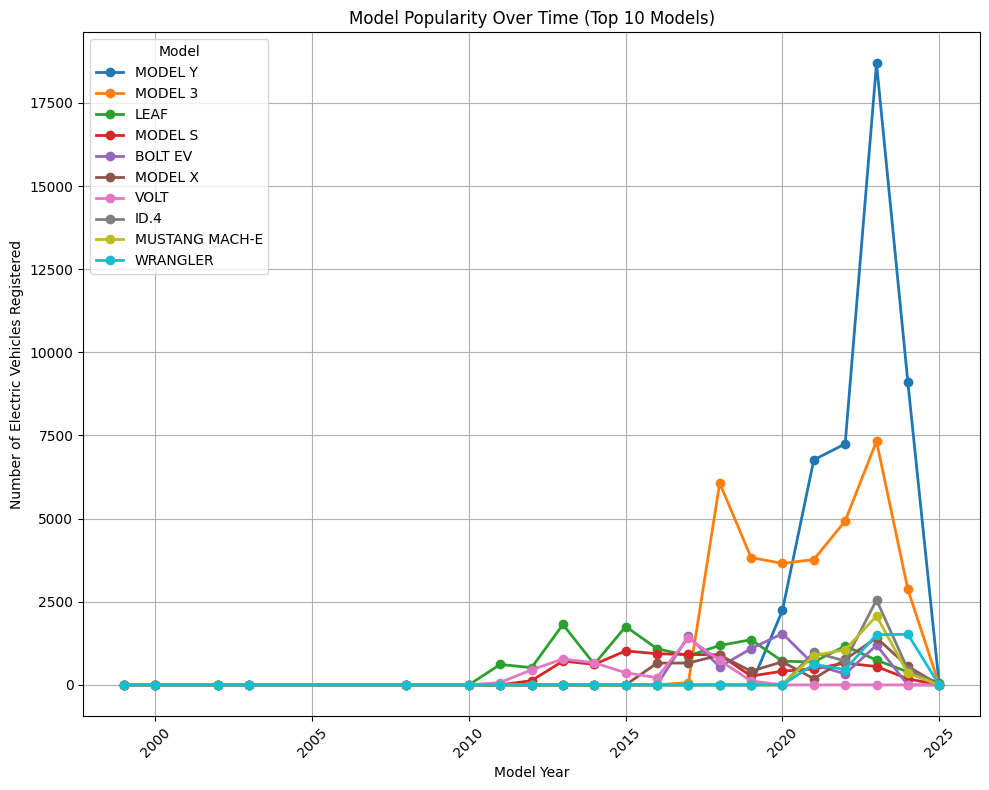

In [46]:
model_popularity = df.groupby(['Model Year', 'Model']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))

# Select the top 10 most popular models based on their total count across all years.
model_popularity_top = model_popularity.loc[:, model_popularity.sum().nlargest(10).index]

# Plot the popularity of the top 10 models over time, with markers at each data point.
model_popularity_top.plot(kind='line', marker='o', linewidth=2, figsize=(10, 8))
plt.title('Model Popularity Over Time (Top 10 Models)')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles Registered')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Model')
plt.tight_layout()
plt.show()

***Explanation:*** This line plot illustrates the popularity of the top 10 EV models across different model years. Notably, Model Y and Model 3 show a steep rise in registrations, highlighting them as dominant choices among EV buyers in recent years. Other models like Leaf, Model S, and Bolt EV also show consistent popularity but with lower numbers compared to Tesla’s top models. The trends in this plot reveal shifting consumer preferences, with newer models gaining popularity over time, possibly due to improved features, increased range, and brand reputation.